In [5]:
#librerias
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [6]:
np.random.seed(0)

In [7]:
#Generación aleatoria de datos sesgados
def datos_sesgados(sesgo, cantidad, maximo):
    aleatorios = stats.skewnorm.rvs(sesgo, loc = 2.5, size = cantidad, random_state = 0)
    aleatorios = aleatorios + abs(aleatorios.min())
    aleatorios = np.round(aleatorios, 2)/aleatorios.max() * maximo
    return np.round(aleatorios, 1)


In [8]:
edades = datos_sesgados(3,100000,62)

In [9]:
edades

array([38.8, 33.5, 34.2, ..., 34.3, 38.1, 37.4])

In [10]:
edades.min()

np.float64(19.5)

In [11]:
# Muestra
tamaño_muestra = 100
muestra = np.random.choice(edades, tamaño_muestra)
muestra

# Generación de múltiples muestras
muestras_generadas = np.array([])
num_muestras = 1000
for i in range(num_muestras):
    muestras_generadas = np.append(muestras_generadas, np.random.choice(edades, tamaño_muestra, replace=True))

muestras_generadas = muestras_generadas.reshape(-1, tamaño_muestra)
muestras_generadas


array([[33.6, 30.2, 28.7, ..., 27.6, 36.2, 44.6],
       [29.8, 29.6, 32.5, ..., 34.5, 34.2, 31.6],
       [27. , 27.4, 38.6, ..., 31.1, 32.9, 30.8],
       ...,
       [29.5, 36.9, 29. , ..., 33.3, 31.7, 33.2],
       [34.2, 33.2, 32.7, ..., 31.1, 28.2, 31.4],
       [33.7, 31.4, 31.9, ..., 25. , 34.2, 30.6]])

In [12]:
muestras_generadas.shape



(1000, 100)

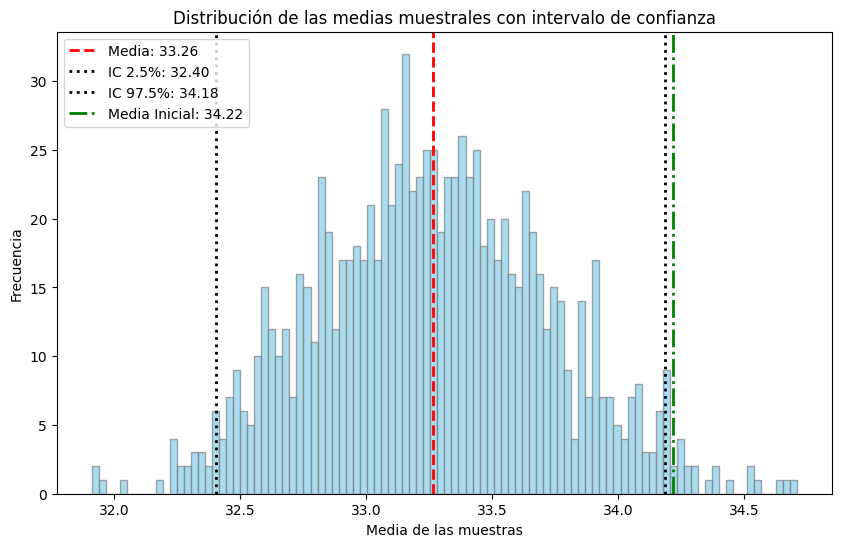

In [13]:
# Calcular el intervalo de confianza del 95%
int_confianza = np.quantile(muestras_generadas.mean(axis=1), [0.025, 0.975])
int_confianza

# Calcular la media de los promedios de las muestras
promedios_muestras = muestras_generadas.mean(axis=1)
media = promedios_muestras.mean()
media

# Calcular los cuantiles del 2.5% y 97.5% (límites del intervalo de confianza)
q_025 = np.quantile(promedios_muestras, 0.025)
q_025

q_0975 = np.quantile(promedios_muestras, 0.975)
q_0975

# Calcular la media de la muestra original
media_inicial = muestra.mean()
media_inicial

# Crear el histograma y agregar las líneas de los cuantiles y la media
plt.figure(figsize=(10,6))
plt.hist(promedios_muestras, bins=100, color="skyblue", edgecolor="gray", alpha=0.7)
plt.axvline(media, color="red", linestyle="--", linewidth=2, label=f"Media: {media:.2f}")
plt.axvline(q_025, color="black", linestyle="dotted", linewidth=2, label=f"IC 2.5%: {q_025:.2f}")
plt.axvline(q_0975, color="black", linestyle="dotted", linewidth=2, label=f"IC 97.5%: {q_0975:.2f}")
plt.axvline(media_inicial, color="green", linestyle="-.", linewidth=2, label=f"Media Inicial: {media_inicial:.2f}")

plt.legend()
plt.xlabel("Media de las muestras")
plt.ylabel("Frecuencia")
plt.title("Distribución de las medias muestrales con intervalo de confianza")
plt.show()

**Ejercicio de TSLA**

In [14]:
from datetime import datetime

now = datetime.now()
dt_string = now.strftime("%d/%m/%Y")

In [15]:
import yfinance as yf

In [16]:
import pandas as pd
import numpy as np

In [17]:
Ticker = "TSLA"
Start_Date = "2023-10-18"
End_Date  = "2024-10-18"
data = yf.download(Ticker, Start_Date, End_Date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [15]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-10-18,242.679993,254.630005,242.080002,252.699997,125147800
2023-10-19,220.110001,230.610001,216.779999,225.949997,170772700
2023-10-20,211.990005,218.860001,210.419998,217.009995,137734000
2023-10-23,212.080002,216.979996,202.509995,210.000000,150683400
2023-10-24,216.520004,222.050003,214.110001,216.500000,118231100


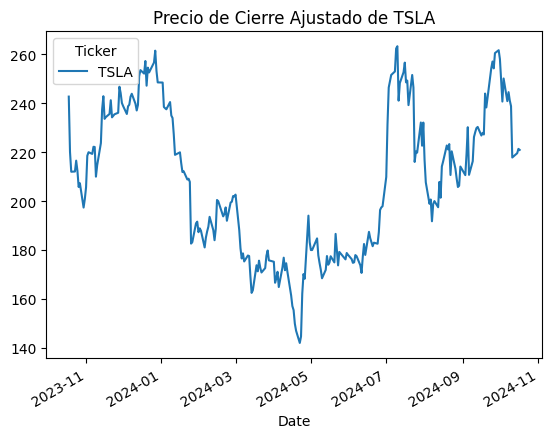

In [18]:
data['Close'].plot(title=f"Precio de Cierre Ajustado de {Ticker}")
plt.show()

In [19]:
datos = pd.DataFrame(data['Close'])
datos

Ticker,TSLA
Date,
2023-10-18,242.679993
2023-10-19,220.110001
2023-10-20,211.990005
2023-10-23,212.080002
2023-10-24,216.520004
...,...
2024-10-11,217.800003
2024-10-14,219.160004
2024-10-15,219.570007


In [20]:
datos.min()

,0
Ticker,
TSLA,142.050003


In [21]:
datos.max()

,0
Ticker,
TSLA,263.26001


In [19]:
datos.columns

Index(['TSLA'], dtype='object', name='Ticker')

In [22]:
datos['Log_Return'] = np.log(datos['TSLA'] / datos['TSLA'].shift(-1))
datos

Ticker,TSLA,Log_Return
Date,,
2023-10-18,242.679993,0.097616
2023-10-19,220.110001,0.037588
2023-10-20,211.990005,-0.000424
2023-10-23,212.080002,-0.020719
2023-10-24,216.520004,0.019118
...,...,...
2024-10-11,217.800003,-0.006225
2024-10-14,219.160004,-0.001869
2024-10-15,219.570007,-0.007984


In [23]:
datos_invertidos = datos[::-1].fillna(0)
datos_invertidos

Ticker,TSLA,Log_Return
Date,,
2024-10-17,220.889999,0.000000
2024-10-16,221.330002,0.001990
2024-10-15,219.570007,-0.007984
2024-10-14,219.160004,-0.001869
2024-10-11,217.800003,-0.006225
...,...,...
2023-10-24,216.520004,0.019118
2023-10-23,212.080002,-0.020719
2023-10-20,211.990005,-0.000424


In [24]:
# Muestra
import random
#tamano_muestra = random.randint(1, 365)
tamano_muestra = 100
muestra = datos_invertidos['Log_Return'].head(tamano_muestra)
muestra

,Log_Return
Date,
2024-10-17,0.000000
2024-10-16,0.001990
2024-10-15,-0.007984
2024-10-14,-0.001869
2024-10-11,-0.006225
...,...
2024-06-03,0.008659
2024-05-31,0.010103
2024-05-30,0.003979


In [25]:
muestras_generadas = np.array([])
num_muestras = 100
for i in range(num_muestras):
    muestras_generadas = np.append(muestras_generadas, np.random.choice(muestra, tamano_muestra, replace = True))

muestras_generadas = muestras_generadas.reshape(-1, tamano_muestra)
muestras_generadas

array([[-0.05018272, -0.01512401, -0.03839571, ..., -0.015397  ,
        -0.00920378,  0.08822077],
       [ 0.00258853, -0.00479489,  0.03550383, ...,  0.0029446 ,
        -0.01760983, -0.00186905],
       [-0.04475927, -0.01693579, -0.04814038, ..., -0.02060688,
         0.01893906,  0.05813634],
       ...,
       [ 0.03550383, -0.00976671,  0.08824049, ...,  0.02060765,
         0.09192354, -0.03811348],
       [-0.00976671,  0.00204521,  0.13164294, ..., -0.00976671,
        -0.01953113,  0.02101027],
       [-0.04814038, -0.00862874, -0.01666045, ...,  0.03550383,
         0.04526769, -0.05877983]])

In [26]:
# Seleccionar 4 índices aleatorios entre 0 y 999
indices_aleatorios = np.random.choice(muestras_generadas.shape[0], size=4, replace=False)

# Obtener las 4 filas aleatorias
filas_aleatorias  = muestras_generadas[indices_aleatorios]
filas_aleatorias

array([[ 0.03280344,  0.03414807,  0.01010257,  0.00865948,  0.04324862,
         0.04330171,  0.01667672, -0.00976671,  0.01652928,  0.01667672,
        -0.00353897,  0.04107614, -0.0058169 , -0.02424923,  0.00198997,
        -0.03811348, -0.04157282,  0.00235232, -0.01760983, -0.00257262,
         0.01893906,  0.03280344, -0.00186905, -0.01464892,  0.01386002,
        -0.01464892, -0.06143631,  0.00198997, -0.0058169 , -0.00798369,
        -0.06337305,  0.01262939, -0.03725544, -0.00208649, -0.00733721,
        -0.00448204, -0.0058169 , -0.00186905,  0.05813634, -0.00131513,
         0.01421092,  0.01893906, -0.00186905,  0.01535898, -0.00798369,
        -0.0029333 , -0.02879901,  0.04330171, -0.00448204, -0.05018272,
        -0.01464892,  0.03280344, -0.00131513,  0.003979  ,  0.003979  ,
         0.0319197 ,  0.03768958, -0.06143631, -0.00976671,  0.02351975,
        -0.00562979, -0.0088106 ,  0.03414807, -0.00479489, -0.06337305,
         0.00204521, -0.00562979, -0.015397  , -0.0

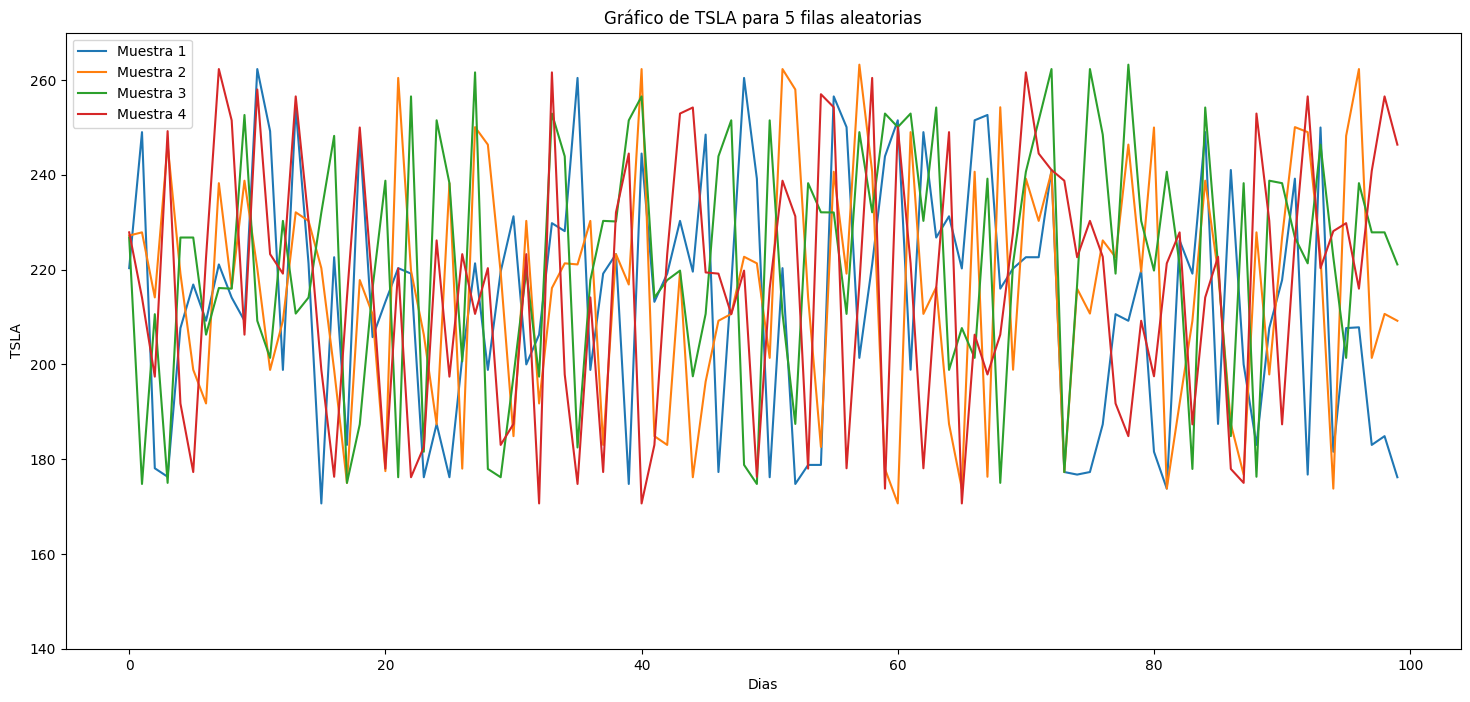

In [27]:
# Configurar el gráfico
plt.figure(figsize=(18, 8))

# Iterar sobre las filas aleatorias y graficarlas
for i in range(4):
    # Crear el DataFrame para la fila aleatoria
    tabla = pd.DataFrame(filas_aleatorias[i], columns=['Log_Return'])

    # Realizar el merge con datos_invertidos
    resultado = pd.merge(tabla, datos_invertidos, left_on='Log_Return', right_on='Log_Return', how='left')

    # Graficar la serie 'BTC-USD' resultante con un color diferente
    plt.plot(resultado['TSLA'], label=f'Muestra {i+1}')  # Etiqueta cada línea con su índice

# Añadir título y leyenda
plt.ylim(140, 270)
plt.title('Gráfico de TSLA para 5 filas aleatorias')
plt.xlabel('Dias')
plt.ylabel('TSLA')
plt.legend()
plt.show()

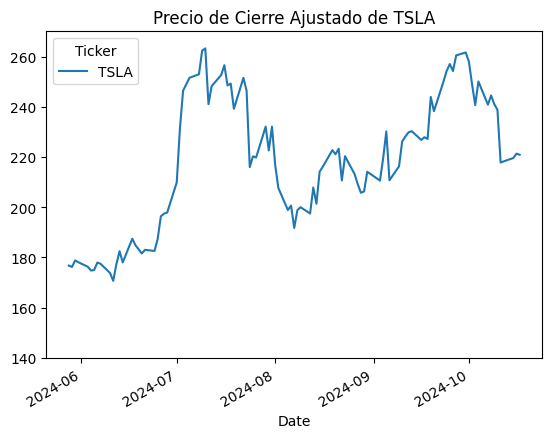

In [28]:
# Graficar solo los últimos 100 datos de 'Close'
data['Close'].iloc[-100:].plot(title=f"Precio de Cierre Ajustado de {Ticker}")

# Mostrar el gráfico
plt.ylim(140, 270)
plt.show()

<ipython-input-29-6e2801f24945>:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  montecarlo_results[f'sim_{i}'] = pd.Series(simulation)
<ipython-input-29-6e2801f24945>:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  montecarlo_results[f'sim_{i}'] = pd.Series(simulation)
<ipython-input-29-6e2801f24945>:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get 

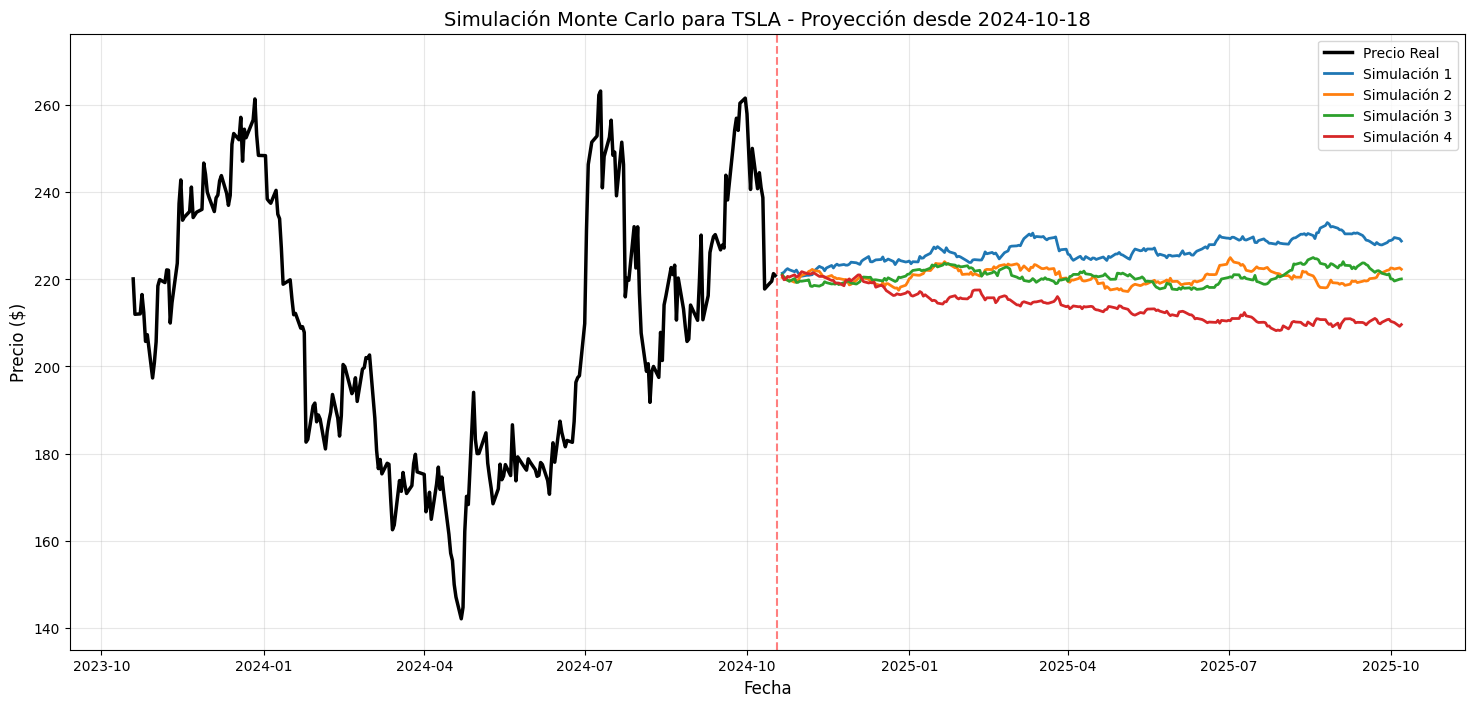

Mu ajustado (retorno diario promedio): 0.000187
Sigma (volatilidad diaria): 0.034869
Precio inicial de simulación: 220.89
Mínimo precio histórico: 142.05
Máximo precio histórico: 263.26


In [29]:
datos = pd.DataFrame(data['Close'])
datos.columns = ['TSLA']
datos['Log_Return'] = np.log(datos['TSLA'] / datos['TSLA'].shift(1))
datos = datos.dropna()

N = len(datos) - 1
mu = datos['Log_Return'].sum() / N
sigma = np.sqrt(np.sum((datos['Log_Return'] - mu)**2) / (N - 1))


if mu < 0:
    mu = abs(datos['Log_Return'].mean()) * 0.5
else:
    mu = mu * 1.1


def MGB_acciones(mu, sigma, starting_price, steps, min_drop=-0.5):
    dt = 1/252
    s0 = starting_price
    et_vector = np.random.normal(loc=0, scale=1, size=steps)
    exp_vector = np.exp((mu - (sigma**2) / 2) * dt + sigma * et_vector * np.sqrt(dt))

    st_1 = [s0]
    for i in range(steps):
        s = st_1[i] * exp_vector[i]
        if s < st_1[i] * (1 + min_drop):
            s = st_1[i] * (1 + min_drop)
        st_1.append(s)
    return st_1[1:]


num_simulations = 500
steps = 252
starting_price = datos['TSLA'].iloc[-1]
montecarlo_results = pd.DataFrame()

for i in range(num_simulations):
    simulation = MGB_acciones(mu, sigma, starting_price, steps)
    montecarlo_results[f'sim_{i}'] = pd.Series(simulation)


np.random.seed(42)
random_indices = np.random.choice(num_simulations, size=4, replace=False)
random_simulations = montecarlo_results.iloc[:, random_indices]


historical_dates = datos.index
projection_dates = pd.date_range(start=End_Date, periods=steps + 1, freq='B')[1:]
all_dates = pd.concat([pd.Series(historical_dates), pd.Series(projection_dates)])


plt.figure(figsize=(18, 8))


plt.plot(historical_dates,
         datos['TSLA'],
         color='black',
         linewidth=2.5,
         label='Precio Real')


for i in range(4):
    simulation_data = pd.concat([
        pd.Series([starting_price]),
        random_simulations.iloc[:, i]
    ])
    plt.plot(projection_dates,
             random_simulations.iloc[:, i],
             linewidth=2,
             label=f'Simulación {i+1}')


plt.axvline(x=pd.to_datetime(End_Date),
            color='red',
            linestyle='--',
            alpha=0.5)
plt.title(f"Simulación Monte Carlo para {Ticker} - Proyección desde {End_Date}", fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)


all_values = pd.concat([datos['TSLA'], random_simulations.stack()])
plt.ylim(all_values.min() * 0.95, all_values.max() * 1.05)

plt.show()

print(f"Mu ajustado (retorno diario promedio): {mu:.6f}")
print(f"Sigma (volatilidad diaria): {sigma:.6f}")
print(f"Precio inicial de simulación: {starting_price:.2f}")
print(f"Mínimo precio histórico: {datos['TSLA'].min():.2f}")
print(f"Máximo precio histórico: {datos['TSLA'].max():.2f}")
